NAME: MOUSINA BARMAN

ROLL: MA23M011

DA6401_assignment1

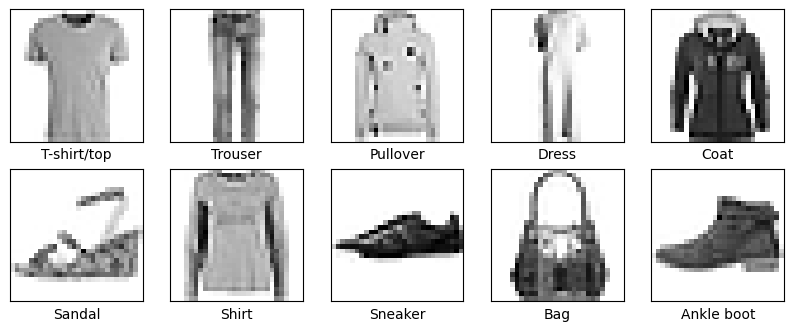

The shape of training images: (48000, 784)
The shape of training labels: (48000, 10)
The shape of validation images: (12000, 784)
The shape of validation labels: (12000, 10)
The shape of testing images shape: (10000, 784)
The shape of testing labels: (10000, 10)


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

# Load the Fashion-MnIST dataset
(X_trn, Y_trn), (X_tst, Y_tst) = fashion_mnist.load_data()
X_trn, X_valid, Y_trn, Y_valid = train_test_split(X_trn, Y_trn, test_size=0.2, random_state=42)

# Define class labels
class_names = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
                5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}



plt.figure(figsize=(10, 10))
for name in range(10):
    k = next(i for i, j in enumerate(Y_trn) if j == name)
    plt.subplot(5, 5, name + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_trn[k], cmap=plt.cm.binary)
    plt.xlabel(class_names[name])
plt.show()


# Function to flatten images
def fltn_img(img):
    return img.reshape(img.shape[0], -1)

# Function to normalize images
def normalize_img(img):
    return img / 255.0

# Apply preprocessing functions
X_trn = normalize_img(fltn_img(X_trn))
X_valid = normalize_img(fltn_img(X_valid))
X_tst = normalize_img(fltn_img(X_tst))

# Function to convert labels to one-hot encoding
def oneHotEncode(array):
    mattrix = np.zeros((len(array), 10))
    for i in range(len(array)):
        mattrix[i, array[i]] = 1
    return mattrix

# Convert labels to one-hot encoding
Y_trn = oneHotEncode(Y_trn)
Y_valid = oneHotEncode(Y_valid)
Y_tst = oneHotEncode(Y_tst)

print("The shape of training images:", X_trn.shape)
print("The shape of training labels:", Y_trn.shape)
print("The shape of validation images:", X_valid.shape)
print("The shape of validation labels:", Y_valid.shape)
print("The shape of testing images shape:", X_tst.shape)
print("The shape of testing labels:", Y_tst.shape)




**Question 2 (10 Marks)**


**Implement a feedforward neural network which takes images from the fashion-mnist data as input and outputs a probability distribution over the 10 classes.**

**Your code should be flexible such that it is easy to change the number of hidden layers and the number of neurons in each hidden layer.**

Feed Forward neural network for Full Batch Data Set

In [31]:
def sigmoid(x):
  return 1 /(1 + np.exp(-x))

def relu(x):
  return np.maximum(0, x)

def tanh(x):
	return np.tanh(x)

def grad_sigmoid(x):
  return sigmoid(x)*(1-sigmoid(x))

def grad_relu(x):
  return np.where(x <= 0, 0, 1)

def grad_tanh(x):
  return (1 - (tanh(x))**2)

def softmax(x):
  x = x - np.max(x)
  return np.exp(x)/np.sum(np.exp(x),axis=0)

def activ(x, act_f):
  if act_f == 'sigmoid':
    return sigmoid(x)
  elif act_f == 'relu':
    return relu(x)
  else:
    return tanh(x)


def grad_act(x, act_f):
  if act_f == 'sigmoid':
    return grad_sigmoid(x)
  elif act_f == 'relu':
    return grad_relu(x)
  else:
    return grad_tanh(x)


def initial_network( hidden_lyr_num,hidden_lyr_nod_num, paramt, input_dimm, output_dimm ):
    network_dimm = []
    for i in range(hidden_lyr_num):
      network_dimm.append(hidden_lyr_nod_num[i])

    dimm = [input_dimm] + network_dimm + [output_dimm]
    theta_0 = {}
    if paramt == 'random':
      for i in range(1, hidden_lyr_num+2):
        theta_0['W' + str(i)] = np.random.randn(dimm[i], dimm[i-1])
        theta_0['b' + str(i)] = np.random.randn(dimm[i], 1)
    if paramt == 'xavier':
      for i in range(1, hidden_lyr_num+2):
        scal_factr = np.sqrt(2 / dimm[i - 1])# Compute the scaling factor for weight initialization
        theta_0['W' + str(i)] = np.random.randn(dimm[i], dimm[i - 1]) * scal_factr
        theta_0['b' + str(i)] = np.random.randn(dimm[i], 1) * scal_factr
    return theta_0


def ForwardProp(x,theta_0, hidden_lyr_num,input_dimm):
  a = {}
  a['a'+str(0)] = np.zeros((input_dimm,1))
  h = {'h0':x}
  for i in range(1,hidden_lyr_num+1):
    a["a" + str(i)] = np.dot(theta_0['W' + str(i)],h['h' + str(i-1)]) + theta_0['b' + str(i)]
    h['h' + str(i)] = sigmoid(a["a" + str(i)])
  a['a' + str(hidden_lyr_num+1)] = np.dot(theta_0['W'+str(hidden_lyr_num+1)],h['h'+str(hidden_lyr_num)]) + theta_0['b'+str(hidden_lyr_num+1)]
  Y_Pred = softmax(a['a' + str(hidden_lyr_num+1)])
  return a,h,Y_Pred


def BackProp(x, Y_true, hidden_lyr_num, theta_0, input_dimm):
    m = x.shape[0]
    #n=hidden_lyr_num+1
    a, h, Y_Pred = ForwardProp(x, theta_0, hidden_lyr_num,input_dimm)
    deriv_w_b = {}
    deriv_h_a = {}
    deriv_h_a['a' + str(hidden_lyr_num+1)] = -1 * (Y_true.T - Y_Pred)
    for i in range(hidden_lyr_num+1, 0, -1):
        deriv_w_b['W' + str(i)] = (1/m)*np.dot(deriv_h_a['a' + str(i)], h['h' + str(i-1)].T)
        deriv_w_b['b' + str(i)] = (1/m)*np.mean(deriv_h_a['a' + str(i)], axis=1, keepdims=True)  # Adjusted dimension
        deriv_h_a['h' + str(i-1)] = np.dot(theta_0['W' + str(i)].T, deriv_h_a['a' + str(i)])
        deriv_h_a['a' + str(i-1)] = deriv_h_a['h' + str(i-1)] * (grad_sigmoid(a['a' + str(i-1)]))

    return deriv_w_b


def GradientDec(step_size, theta_0, x, Y_true, hidden_lyr_num,input_dimm):
  for epoch in range(100):
    gradient = BackProp(x, Y_true, hidden_lyr_num, theta_0,input_dimm)
    for i in range(1, hidden_lyr_num+2):
      theta_0['W' + str(i)] -= step_size*gradient['W' + str(i)]
      theta_0['b' + str(i)] -= step_size*gradient['b' + str(i)]
  return theta_0


def CalAccuracy(X_tst,Y_tst,theta_0_new, hidden_lyr_num,input_dimm):
  a,h,Y_tst_Pred = ForwardProp(X_tst,theta_0_new, hidden_lyr_num,input_dimm)

  assert Y_tst.shape == Y_tst_Pred.shape
  Y_tst = np.argmax(Y_tst, axis = 0)
  Y_tst_Pred = np.argmax(Y_tst_Pred, axis = 0)
  true_predictions = 0
  for i in range(Y_tst.shape[0]):
    if Y_tst[i] == Y_tst_Pred[i]:
      true_predictions += 1
  accu = true_predictions /Y_tst.shape[0]

  return accu


In [32]:
#Batch gradient descent

def GradientDec(step_size, theta_0, x, Y_true, hidden_lyr_num, input_dimm):
    loss_val = []  # List to store the loss for each epoch
    for epoch in range(100):
        gradient = BackProp(x, Y_true, hidden_lyr_num, theta_0, input_dimm)
        for i in range(1, hidden_lyr_num + 2):
            theta_0['W' + str(i)] -= step_size * gradient['W' + str(i)]
            theta_0['b' + str(i)] -= step_size * gradient['b' + str(i)]

        # Compute and store the loss for this epoch
        a, _, Y_Pred = ForwardProp(x, theta_0, hidden_lyr_num, input_dimm)
        loss = -np.mean(np.sum(Y_true.T * np.log(Y_Pred), axis=0))
        loss_val.append(loss)

        print(f"Epoch {epoch+1}, Loss: {loss}")

    # Plot the loss function over epochs
    plt.plot(loss_val)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss vs Epochs')
    plt.show()

    return theta_0 , loss_val




**Question 3 (24 Marks)**

**Implement the backpropagation algorithm with support for the following optimisation functions**

**sgd**

**momentum based gradient descent**

**nesterov accelerated gradient descent**

**rmsprop**

**adam**

**nadam**

**note that the code should be flexible enough to work with different batch sizes.**


In [33]:

def cross_entropy_f(Y_true,Y_Pred):
    epsln = 1e-15  # to prevent log(0) which is undefined
    Y_Pred = np.clip(Y_Pred, epsln, 1 - epsln)
    loss = -np.mean(np.sum(Y_true * np.log(Y_Pred), axis=0))
    return loss


def ForwardProp(x,theta_0,activ_f,hidden_lyr_num,input_dimm):
  a = {}
  a['a'+str(0)] = np.zeros((input_dimm,1))
  h = {'h0':x}
  for i in range(1,hidden_lyr_num+1):
    a["a" + str(i)] = np.dot(theta_0['W' + str(i)],h['h' + str(i-1)]) + theta_0['b' + str(i)]
    h['h' + str(i)] = activ(a["a" + str(i)], activ_f)
  a['a'+str(hidden_lyr_num+1)] = np.dot(theta_0['W'+str(hidden_lyr_num+1)],h['h'+str(hidden_lyr_num)]) + theta_0['b'+str(hidden_lyr_num+1)]
  Y_Pred = softmax(a['a'+str(hidden_lyr_num+1)])

  return a,h,Y_Pred

def BackProp(x, Y_true, activ_f, hidden_lyr_num, theta_0,input_dimm):

  a,h,Y_Pred = ForwardProp(x,theta_0,activ_f, hidden_lyr_num,input_dimm)
  #n=hidden_lyr_num+1
  deriv_w_b = {}
  deriv_h_a = {}
  deriv_h_a['a'+str(hidden_lyr_num+1)] = -1*(Y_true - Y_Pred)
  for i in range(hidden_lyr_num+1, 0, -1):
    deriv_w_b ['W' + str(i)] = np.dot(deriv_h_a['a' + str(i)],h['h' + str(i-1)].T)
    deriv_w_b['b' + str(i)] = deriv_h_a['a' + str(i)]
    deriv_h_a['h' + str(i-1)] = np.dot(theta_0['W' + str(i)].T,deriv_h_a['a' + str(i)] )
    deriv_h_a['a' + str(i-1)] = deriv_h_a['h' + str(i-1)]*(grad_act(a['a' + str(i-1)], activ_f))

  return deriv_w_b


**Stochastic Gradient Decent**

In [52]:

def stoch_grad_dec(step_size, X_trn, Y_trn, X_valid, Y_valid, epochs, act_f, hidden_lyr_num,hidden_lyr_nod_num, paramt,batch_size, input_dimm, output_dimm):
  theta_0 = initial_network( hidden_lyr_num, hidden_lyr_nod_num, paramt, input_dimm, output_dimm )
  loss_val = []  # List to store the loss for each epoch
  len = X_trn.shape[0]

  for epoch in range(epochs):
      count_of_pts = 0
      arr_val = np.arange(len)
      np.random.shuffle(arr_val)
      new_gradient = {key: np.zeros_like(value) for key, value in theta_0.items()}
      for j in range(len):
          count_of_pts += 1
          x = X_trn[arr_val[j],:].reshape(-1, 1)
          Y_true = Y_trn[arr_val[j],:].reshape(-1, 1)
          gradient = BackProp(x,Y_true, act_f, hidden_lyr_num, theta_0,input_dimm)
          for k in range(1, hidden_lyr_num + 2):
            new_gradient['W'+str(k)] += gradient['W'+str(k)]
            new_gradient['b'+str(k)] += gradient['b'+str(k)]
          if count_of_pts % batch_size == 0:
            for i in range(1, hidden_lyr_num + 2):
                theta_0['W' + str(i)] -= step_size * new_gradient['W' + str(i)]
                theta_0['b' + str(i)] -= step_size * new_gradient['b' + str(i)]

      # Compute and store the loss and accuracy for this epoch
      acc = calAccuracy(X_trn,Y_trn,theta_0,act_f, hidden_lyr_num,input_dimm)
      a, _, Y_Pred= ForwardProp(X_trn.T,theta_0,act_f, hidden_lyr_num,input_dimm)
      loss = cross_entropy_f(Y_trn.T, Y_Pred)
      loss_val.append(loss)
      validation_accu = calAccuracy(X_valid,Y_valid,theta_0,act_f, hidden_lyr_num,input_dimm)


      print(f"Epoch {epoch+1}, Loss: {loss} , Accuracy: {acc*100}")
      #wandb.log({'training_loss': loss})
      #wandb.log({'training_accuracy': acc*100})
      #wandb.log({'Validation_accuracy': validation_accu * 100})
      #wandb.log({'epoch': epoch})
      print({'training_loss': loss})
      print({'training_accuracy': acc*100})
      print({'Validation_accuracy': validation_accu * 100})
      print({'epoch': epoch})



  # Plot the loss function over epochs
  plt.plot(loss_val)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training Loss vs Epochs')
  plt.show()

  return theta_0

def calAccuracy(X_tst,Y_tst,theta_0_new,act_f, hidden_lyr_num,input_dimm):
  len = X_tst.shape[0]
  true_predictions = 0
  for i in range(len):
    X_test = X_tst[i,:].reshape(-1, 1)
    a,h,Y_tst_Pred = ForwardProp(X_test,theta_0_new, act_f, hidden_lyr_num,input_dimm)

    Y1 = np.argmax(Y_tst[i,:].reshape(-1, 1), axis = 0)
    Y2 = np.argmax(Y_tst_Pred, axis = 0)

    if Y1 == Y2:
      true_predictions += 1
  accu = true_predictions /Y_tst.shape[0]

  return accu



**Momentum Based Gradient Decent**

In [61]:
def momentum_grad_dec(step_size, theta_0, X_trn, Y_trn, X_valid, Y_valid, act_f, epochs, hidden_lyr_num, input_dimm, batch_size, beta_val=0.9):
    loss_val = []  # List to store the loss for each epoch
    len = X_trn.shape[0]
    V = {key: np.zeros_like(value) for key, value in theta_0.items()}  # Initialize velocities
    Prev_V = {key: np.zeros_like(value) for key, value in theta_0.items()}
    for epoch in range(epochs):  # Adjust the number of epochs as needed
        count_of_pts = 0
        loss = 0
        itr_no = 0
        count_of_batch = 0
        new_gradient = {key: np.zeros_like(value) for key, value in theta_0.items()}
        for j in range(len):
            count_of_pts += 1
            x = X_trn[j, :].reshape(-1, 1)
            Y_true = Y_trn[j, :].reshape(-1, 1)
            gradient = BackProp(x, Y_true,act_f, hidden_lyr_num, theta_0, input_dimm)
            for i in range(hidden_lyr_num+1, 0, -1):
                new_gradient['W' + str(i)] += gradient['W' + str(i)]
                new_gradient['b' + str(i)] += gradient['b' + str(i)]

            if count_of_pts % batch_size == 0:
              count_of_batch += 1
              for i in range(1, hidden_lyr_num + 2):
                  # Update velocity
                  V['W' + str(i)] = beta_val * Prev_V['W' + str(i)] + step_size * new_gradient['W' + str(i)]
                  V['b' + str(i)] = beta_val * Prev_V['b' + str(i)] + step_size * new_gradient['b' + str(i)]

              for i in range(1, hidden_lyr_num + 2):
                  # Update parameters
                  theta_0['W' + str(i)] -= V['W' + str(i)]
                  theta_0['b' + str(i)] -= V['b' + str(i)]

              for i in range(1, hidden_lyr_num + 2):
                  Prev_V['W' + str(i)] = V['W' + str(i)]
                  Prev_V['b' + str(i)] = V['b' + str(i)]


        acc = calAccuracy(X_trn,Y_trn,theta_0,act_f, hidden_lyr_num,input_dimm)
        a, _, Y_Pred = ForwardProp(X_trn.T,theta_0,act_f, hidden_lyr_num,input_dimm)
        loss = cross_entropy_f(Y_trn.T, Y_Pred)
        loss_val.append(loss)
        validation_accu =calAccuracy(X_valid,Y_valid,theta_0,act_f, hidden_lyr_num,input_dimm)


        print(f"Epoch {epoch+1}, Loss: {loss} , Accuracy: {acc*100}")
        wandb.log({'training_loss': loss})
        wandb.log({'training_accuracy': acc*100})
        wandb.log({'Validation_accuracy': validation_accu * 100})
        wandb.log({'epoch': epoch})
        #print({'training_loss': loss})
        #print({'training_accuracy': acc*100})
        #print({'Validation_accuracy': validation_accu * 100})
        #print({'epoch': epoch})



    # Plot the loss function over epochs
    plt.plot(loss_val)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss vs Epochs')
    plt.show()

    return theta_0



**nestrov Gradient Descent**

In [62]:
def nestrov(step_size, theta_0, X_trn, Y_trn, X_valid, Y_valid, act_f, epochs, hidden_lyr_num, input_dimm, batch_size, beta_val=0.9):
    loss_val = []
    len = X_trn.shape[0]
    V = {key: np.zeros_like(value) for key, value in theta_0.items()}
    Prev_V = {key: np.zeros_like(value) for key, value in theta_0.items()}
    for epoch in range(epochs):
        new_gradient = {key: np.zeros_like(value) for key, value in theta_0.items()}
        count_of_pts = 0
        count_of_batch = 0
        loss = 0
        itr_no = 0
        for j in range(len):
            count_of_pts += 1
            x = X_trn[j, :].reshape(-1, 1)
            Y_true = Y_trn[j, :].reshape(-1, 1)

            for i in range(1, hidden_lyr_num + 2):
              theta_0['W' + str(i)] -= beta_val * Prev_V['W' + str(i)]
              theta_0['b' + str(i)] -= beta_val * Prev_V['b' + str(i)]

            gradient = BackProp(x, Y_true,act_f, hidden_lyr_num, theta_0, input_dimm)
            for i in range(hidden_lyr_num+1, 0, -1):
                new_gradient['W' + str(i)] += gradient['W' + str(i)]
                new_gradient['b' + str(i)] += gradient['b' + str(i)]

            if count_of_pts % batch_size == 0:
              count_of_batch += 1
              for i in range(1, hidden_lyr_num + 2):
                  # Update velocity
                  V['W' + str(i)] = beta_val * Prev_V['W' + str(i)] + step_size * new_gradient['W' + str(i)]
                  V['b' + str(i)] = beta_val * Prev_V['b' + str(i)] + step_size * new_gradient['b' + str(i)]

              for i in range(1, hidden_lyr_num + 2):
                  # Update parameters
                  theta_0['W' + str(i)] -= V['W' + str(i)]
                  theta_0['W' + str(i)] -= V['b' + str(i)]

              for i in range(1, hidden_lyr_num + 2):
                  Prev_V['W' + str(i)]  = V['W' + str(i)]
                  Prev_V['b' + str(i)] = V['W' + str(i)]
        acc = calAccuracy(X_trn,Y_trn,theta_0,act_f, hidden_lyr_num,input_dimm)
        a, _, Y_Pred = ForwardProp(X_trn.T,theta_0,act_f, hidden_lyr_num,input_dimm)
        loss = cross_entropy_f(Y_trn.T, Y_Pred)
        loss_val.append(loss)
        validation_accu =calAccuracy(X_valid,Y_valid,theta_0,act_f, hidden_lyr_num,input_dimm)

        print(f"Epoch {epoch+1}, Loss: {loss} , Accuracy: {acc*100}")
        wandb.log({'training_loss': loss})
        wandb.log({'training_accuracy': acc*100})
        wandb.log({'Validation_accuracy': validation_accu * 100})
        wandb.log({'epoch': epoch})
        #print({'training_loss': loss})
        #print({'training_accuracy': acc*100})
        #print({'Validation_accuracy': validation_accu * 100})
        #print({'epoch': epoch})


    # Plot the loss function over epochs
    plt.plot(loss_val)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.show()

    return theta_0


**RMsprop**

In [63]:
def RMSprop(step_size, theta_0, X_trn, Y_trn, X_valid, Y_valid, act_f, epochs, hidden_lyr_num, input_dimm, batch_size,eps=0.01, beta_val=0.9):
    loss_val = []
    len = X_trn.shape[0]
    V = {key: np.zeros_like(value) for key, value in theta_0.items()}
    Prev_V = {key: np.zeros_like(value) for key, value in theta_0.items()}
    for epoch in range(epochs):
        count_of_pts = 0
        count_of_batch = 0
        loss = 0
        itr_no = 0
        new_gradient = {key: np.zeros_like(value) for key, value in theta_0.items()}
        for j in range(len):
            count_of_pts += 1
            x = X_trn[j, :].reshape(-1, 1)
            Y_true = Y_trn[j, :].reshape(-1, 1)
            gradient = BackProp(x, Y_true,act_f, hidden_lyr_num, theta_0, input_dimm)
            for i in range(hidden_lyr_num+1, 0, -1):
                new_gradient['W' + str(i)] += gradient['W' + str(i)]
                new_gradient['b' + str(i)] += gradient['b' + str(i)]

            if count_of_pts % batch_size == 0:
              count_of_batch += 1
              for i in range(1,hidden_lyr_num + 2):
                  # Update velocity
                  V['W' + str(i)] = beta_val * Prev_V['W' + str(i)] + (1-beta_val)* ((new_gradient['W' + str(i)])**2)
                  V['b' + str(i)] = beta_val * Prev_V['b' + str(i)] + (1-beta_val)* ((new_gradient['b' + str(i)])**2)

              for i in range(1,hidden_lyr_num + 2):
                  # Update parameters
                  theta_0['W' + str(i)] -= (step_size/ (np.sqrt(V['W' + str(i)] + eps)) )*new_gradient['W' + str(i)]
                  theta_0['b' + str(i)] -= (step_size/ (np.sqrt(V['b' + str(i)] + eps)) )*new_gradient['b' + str(i)]

              for i in range(1, hidden_lyr_num + 2):
                  Prev_V['W' + str(i)] = V['W' + str(i)]
                  Prev_V['W' + str(i)] = V['b' + str(i)]


        acc = calAccuracy(X_trn,Y_trn,theta_0,act_f, hidden_lyr_num,input_dimm)
        a, _, Y_Pred = ForwardProp(X_trn.T,theta_0,act_f, hidden_lyr_num,input_dimm)
        loss = cross_entropy_f(Y_trn.T, Y_Pred)
        loss_val.append(loss)
        validation_accu =calAccuracy(X_valid,Y_valid,theta_0,act_f, hidden_lyr_num,input_dimm)

        print(f"Epoch {epoch+1}, Loss: {loss} , Accuracy: {acc*100}")
        wandb.log({'training_loss': loss})
        wandb.log({'training_accuracy': acc*100})
        wandb.log({'Validation_accuracy': validation_accu * 100})
        wandb.log({'epoch': epoch})
        #print({'training_loss': loss})
        #print({'training_accuracy': acc*100})
        #print({'Validation_accuracy': validation_accu * 100})
        #print({'epoch': epoch})



    # Plot the loss function over epochs
    plt.plot(loss_val)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss vs Epochs')
    plt.show()

    return theta_0



**Adam**

In [64]:
def adam(step_size, theta_0, X_trn, Y_trn, X_valid, Y_valid, act_f, epochs, hidden_lyr_num, input_dimm,batch_size,eps, beta1_val=0.9,beta2_val= 0.99):
    loss_val = []  # List to store the loss for each epoch
    len = X_trn.shape[0]
    V = {key: np.zeros_like(value) for key, value in theta_0.items()}
    Prev_V = {key: np.zeros_like(value) for key, value in theta_0.items()}
    V_cap = {key: np.zeros_like(value) for key, value in theta_0.items()}

    M = {key: np.zeros_like(value) for key, value in theta_0.items()}
    Prev_M = {key: np.zeros_like(value) for key, value in theta_0.items()}
    M_cap = {key: np.zeros_like(value) for key, value in theta_0.items()}

    for epoch in range(epochs):  # Adjust the number of epochs as needed
        t = 0
        count_of_pts = 0
        count_of_batch = 0
        loss = 0
        itr_no = 0
        new_gradient = {key: np.zeros_like(value) for key, value in theta_0.items()}
        for j in range(len):
            x = X_trn[j, :].reshape(-1, 1)
            Y_true = Y_trn[j, :].reshape(-1, 1)
            gradient = BackProp(x, Y_true,act_f, hidden_lyr_num, theta_0, input_dimm)
            for i in range(hidden_lyr_num+1, 0, -1):
                new_gradient['W' + str(i)] += gradient['W' + str(i)]
                new_gradient['b' + str(i)] += gradient['b' + str(i)]

            count_of_pts = count_of_pts + 1
            if count_of_pts % batch_size == 0:
              t = t + 1
              count_of_batch += 1

              for i in range(1, hidden_lyr_num + 2):
                  M['W' + str(i)] = beta1_val * Prev_M['W' + str(i)] + (1-beta1_val)* new_gradient['W' + str(i)]
                  M['b' + str(i)] = beta1_val * Prev_M['b' + str(i)] + (1-beta1_val)*new_gradient['b' + str(i)]

              for i in range(1, hidden_lyr_num + 2):
                  M_cap['W' + str(i)] = (1/(1-np.power(beta1_val,t))) * M['W' + str(i)]
                  M_cap['b' + str(i)] = (1/(1-np.power(beta1_val,t))) * M['b' + str(i)]
                  Prev_M['W' + str(i)] = M['W' + str(i)]
                  Prev_M['b' + str(i)] = M['b' + str(i)]

              for i in range(1, hidden_lyr_num + 2):
                  V['W' + str(i)] = beta2_val * Prev_V['W' + str(i)] + (1-beta2_val)* new_gradient['W' + str(i)]
                  V['b' + str(i)] = beta2_val * Prev_V['b' + str(i)] + (1-beta2_val)* new_gradient['b' + str(i)]

              for i in range(1, hidden_lyr_num + 2):
                  V_cap['W' + str(i)] = (1/(1-np.power(beta2_val,t))) *V['W' + str(i)]
                  V_cap['b' + str(i)] = (1/(1-np.power(beta2_val,t))) * V['b' + str(i)]
                  Prev_V['W' + str(i)] = V['W' + str(i)]
                  Prev_V['b' + str(i)] = V['b' + str(i)]


              for i in range(1, hidden_lyr_num + 2):
                  # Update parameters
                  theta_0['W' + str(i)] -= (step_size / (np.sqrt(V_cap['W' + str(i)]+ eps))) * (M_cap['W' + str(i)])
                  theta_0['b' + str(i)] -= (step_size / (np.sqrt(V_cap['b' + str(i)]+ eps))) * (M_cap['b' + str(i)])


                  x_batch = X_trn[itr_no:itr_no+batch_size].T
                  y_batch = Y_trn[itr_no:itr_no+batch_size]
                  itr_no += batch_size


        acc = calAccuracy(X_trn,Y_trn,theta_0,act_f, hidden_lyr_num,input_dimm)
        a, _, Y_Pred = ForwardProp(X_trn.T,theta_0,act_f, hidden_lyr_num,input_dimm)
        loss = cross_entropy_f(Y_trn.T, Y_Pred)
        loss_val.append(loss)
        validation_accu =calAccuracy(X_valid,Y_valid,theta_0,act_f, hidden_lyr_num,input_dimm)

        print(f"Epoch {epoch+1}, Loss: {loss} , Accuracy: {acc*100}")
        wandb.log({'training_loss': loss})
        wandb.log({'training_accuracy': acc*100})
        wandb.log({'Validation_accuracy': validation_accu * 100})
        wandb.log({'epoch': epoch})
        #print({'training_loss': loss})
        #print({'training_accuracy': acc*100})
        #print({'Validation_accuracy': validation_accu * 100})
        #print({'epoch': epoch})



    # Plot the loss function over epochs
    plt.plot(loss_val)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss vs Epochs')
    plt.show()

    return theta_0


**nadam**

In [65]:
def nadam(step_size, theta_0, X_trn, Y_trn, X_valid, Y_valid, act_f, epochs, hidden_lyr_num, input_dimm,batch_size,eps, beta1_val=0.9,beta2_val= 0.99):
    loss_val = []  # List to store the loss for each epoch
    len = X_trn.shape[0]
    V = {key: np.zeros_like(value) for key, value in theta_0.items()}
    Prev_V = {key: np.zeros_like(value) for key, value in theta_0.items()}
    V_cap = {key: np.zeros_like(value) for key, value in theta_0.items()}

    M = {key: np.zeros_like(value) for key, value in theta_0.items()}
    Prev_M = {key: np.zeros_like(value) for key, value in theta_0.items()}
    M_cap = {key: np.zeros_like(value) for key, value in theta_0.items()}


    for epoch in range(epochs):
        t = 0
        count_of_pts = 0
        count_of_batch = 0
        loss = 0
        itr_no = 0
        new_gradient = {key: np.zeros_like(value) for key, value in theta_0.items()}
        for j in range(len):
            x = X_trn[j, :].reshape(-1, 1)
            Y_true = Y_trn[j, :].reshape(-1, 1)
            gradient = BackProp(x, Y_true,act_f, hidden_lyr_num, theta_0, input_dimm)
            for i in range(hidden_lyr_num+1, 0, -1):
                new_gradient['W' + str(i)] += gradient['W' + str(i)]
                new_gradient['b' + str(i)] += gradient['b' + str(i)]
            count_of_pts += 1
            if count_of_pts % batch_size == 0:
              t = t + 1
              count_of_batch += 1

              for i in range(1, hidden_lyr_num + 2):
                  M['W' + str(i)] = beta1_val * Prev_M['W' + str(i)] + (1-beta1_val)* new_gradient['W' + str(i)]
                  M['b' + str(i)] = beta1_val * Prev_M['b' + str(i)] + (1-beta1_val)*new_gradient['b' + str(i)]


              for i in range(1, hidden_lyr_num + 2):
                  M_cap['W' + str(i)] = (1/(1-np.power(beta1_val,t))) * M['W' + str(i)]
                  M_cap['b' + str(i)] = (1/(1-np.power(beta1_val,t))) * M['b' + str(i)]
                  Prev_M['W' + str(i)] = M['W' + str(i)]
                  Prev_M['b' + str(i)] = M['b' + str(i)]

              for i in range(1, hidden_lyr_num + 2):
                  V['W' + str(i)] = beta2_val * Prev_V['W' + str(i)] + (1-beta2_val)* ((new_gradient['W' + str(i)])**2)
                  V['b' + str(i)] = beta2_val * Prev_V['b' + str(i)] + (1-beta2_val)* ((new_gradient['b' + str(i)])**2)
              for i in range(1, hidden_lyr_num + 2):
                  V_cap['W' + str(i)] = (1/(1-np.power(beta2_val,t))) *V['W' + str(i)]
                  V_cap['b' + str(i)] = (1/(1-np.power(beta2_val,t))) * V['b' + str(i)]
                  Prev_V['W' + str(i)] = V['W' + str(i)]
                  Prev_V['b' + str(i)] = V['b' + str(i)]


              for i in range(1, hidden_lyr_num + 2):
                  # Update parameters
                  theta_0['W' + str(i)] -= (step_size/ (np.sqrt(V_cap['W' + str(i)] + eps)) )*(beta1_val*(M_cap['W' + str(i)])+((1-beta1_val)* new_gradient['W' + str(i)])/(1-np.power(beta1_val,t)))
                  theta_0['b' + str(i)] -= (step_size/ (np.sqrt(V_cap['b' + str(i)] + eps)) )*(beta1_val*(M_cap['b' + str(i)])+((1-beta1_val)* new_gradient['b' + str(i)])/(1-np.power(beta1_val,t)))

        acc = calAccuracy(X_trn,Y_trn,theta_0,act_f, hidden_lyr_num,input_dimm)
        a, _, Y_Pred = ForwardProp(X_trn.T,theta_0,act_f, hidden_lyr_num,input_dimm)
        loss = cross_entropy_f(Y_trn.T, Y_Pred)
        loss_val.append(loss)
        validation_accu =calAccuracy(X_valid,Y_valid,theta_0,act_f, hidden_lyr_num,input_dimm)

        print(f"Epoch {epoch+1}, Loss: {loss} , Accuracy: {acc*100}")
        wandb.log({'training_loss': loss})
        wandb.log({'training_accuracy': acc*100})
        wandb.log({'Validation_accuracy': validation_accu * 100})
        wandb.log({'epoch': epoch})
        #print({'training_loss': loss})
        #print({'training_accuracy': acc*100})
        #print({'Validation_accuracy': validation_accu * 100})
        #print({'epoch': epoch})




    plt.plot(loss_val)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss vs Epochs')
    plt.show()

    return theta_0


In [67]:
def model_train(step_size, X_trn, Y_trn, X_valid, Y_valid, optimizer, regular_param, epochs, act_f, hidden_lyr_num, hidden_lyr_nod_num,
                paramt, input_dimm, output_dimm, batch_size, eps, beta_val=0.9, beta1_val=0.9, beta2_val=0.99):

    theta_0 = initial_network(hidden_lyr_num, hidden_lyr_nod_num, paramt, input_dimm, output_dimm)

    if optimizer == 'sgd':
        W_b = stoch_grad_dec(step_size, X_trn, Y_trn, X_valid, Y_valid, epochs, act_f, hidden_lyr_num, hidden_lyr_nod_num, paramt, batch_size, input_dimm, output_dimm)
    elif optimizer == 'momentum':
        W_b = momentum_grad_dec(step_size, theta_0, X_trn, Y_trn, X_valid, Y_valid, act_f, epochs, hidden_lyr_num, input_dimm, batch_size, beta_val)
    elif optimizer == 'nag':
        W_b = nestrov(step_size, theta_0, X_trn, Y_trn, X_valid, Y_valid, act_f, epochs, hidden_lyr_num, input_dimm, batch_size, beta_val)
    elif optimizer == 'RMSprop':
        W_b = RMSprop(step_size, theta_0, X_trn, Y_trn, X_valid, Y_valid, act_f, epochs, hidden_lyr_num, input_dimm, batch_size, eps, beta_val)
    elif optimizer == 'adam':
        W_b = adam(step_size, theta_0, X_trn, Y_trn, X_valid, Y_valid, act_f, epochs, hidden_lyr_num, input_dimm, batch_size, eps, beta1_val, beta2_val)
    elif optimizer == 'nadam':
        W_b = nadam(step_size, theta_0, X_trn, Y_trn, X_valid, Y_valid, act_f, epochs, hidden_lyr_num, input_dimm, batch_size, eps, beta1_val, beta2_val)

# Define parameters
step_size = 0.0001
optimizer = 'sgd'
regular_param = 0.0001
epochs = 10
act_f = 'sigmoid'
hidden_lyr_num = 3
hidden_lyr_nod_num = [32, 64, 128]
paramt = 'xavier'
input_dimm = 784
output_dimm = 10
batch_size = 32
eps = 1e-5

# Call the function (Ensure X_trn, Y_trn, X_valid, Y_valid are defined)
#model_train(step_size, X_trn, Y_trn, X_valid, Y_valid, optimizer, regular_param, epochs, act_f, hidden_lyr_num, hidden_lyr_nod_num, paramt, input_dimm, output_dimm, batch_size, eps, beta_val=0.9, beta1_val=0.9, beta2_val=0.99)


**Model Training**

In [68]:
import wandb
wandb.login(key='580e769ee2f34eafdded556ce52aaf31c265ad3b')  # Ensure WandB login before initialization

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [69]:
from types import SimpleNamespace
import random

Create sweep with ID: 14bwgxxy
Sweep URL: https://wandb.ai/ma23m011-iit-madras/DA6401_Assignment1_ma23m011/sweeps/14bwgxxy


wandb: Agent Starting Run: 6ffhq8i7 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layer: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	weight: random
wandb: 	weight_decay: 0


<ipython-input-64-766fabe3cd8c>:55: RuntimeWarning: invalid value encountered in sqrt
  theta_0['W' + str(i)] -= (step_size / (np.sqrt(V_cap['W' + str(i)]+ eps))) * (M_cap['W' + str(i)])
<ipython-input-64-766fabe3cd8c>:56: RuntimeWarning: invalid value encountered in sqrt
  theta_0['b' + str(i)] -= (step_size / (np.sqrt(V_cap['b' + str(i)]+ eps))) * (M_cap['b' + str(i)])


Epoch 1, Loss: nan , Accuracy: 9.995833333333334
Epoch 2, Loss: nan , Accuracy: 9.995833333333334
Epoch 3, Loss: nan , Accuracy: 9.995833333333334
Epoch 4, Loss: nan , Accuracy: 9.995833333333334
Epoch 5, Loss: nan , Accuracy: 9.995833333333334


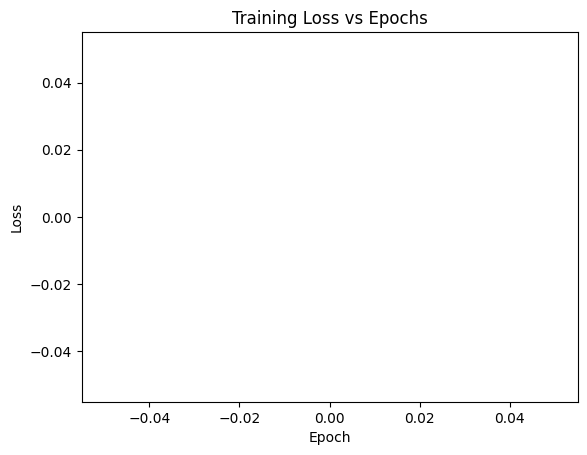

Validation_accuracy,▁▁▁▁▁
epoch,▁▃▅▆█
training_accuracy,▁▁▁▁▁
Validation_accuracy,10.01667
epoch,4
training_accuracy,9.99583
training_loss,nan


wandb: Agent Starting Run: h51zr68j with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layer: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	weight: random
wandb: 	weight_decay: 0.0005


<ipython-input-31-a70bfbe05f64>:2: RuntimeWarning: overflow encountered in exp
  return 1 /(1 + np.exp(-x))


Epoch 1, Loss: 7.937117947002892 , Accuracy: 9.977083333333333
{'training_loss': 7.937117947002892}
{'training_accuracy': 9.977083333333333}
{'Validation_accuracy': 10.091666666666667}
{'epoch': 0}
Epoch 2, Loss: 4.890278182510229 , Accuracy: 10.085416666666665
{'training_loss': 4.890278182510229}
{'training_accuracy': 10.085416666666665}
{'Validation_accuracy': 9.658333333333333}
{'epoch': 1}
Epoch 3, Loss: 7.081843915133221 , Accuracy: 9.960416666666665
{'training_loss': 7.081843915133221}
{'training_accuracy': 9.960416666666665}
{'Validation_accuracy': 10.158333333333333}
{'epoch': 2}
Epoch 4, Loss: 4.097147722640444 , Accuracy: 9.960416666666665
{'training_loss': 4.097147722640444}
{'training_accuracy': 9.960416666666665}
{'Validation_accuracy': 10.158333333333333}
{'epoch': 3}
Epoch 5, Loss: 3.895247771071126 , Accuracy: 9.995833333333334
{'training_loss': 3.895247771071126}
{'training_accuracy': 9.995833333333334}
{'Validation_accuracy': 10.016666666666667}
{'epoch': 4}
Epoch 6, 

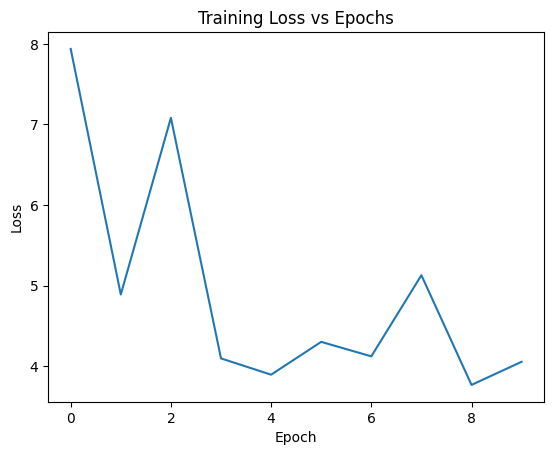

wandb: Agent Starting Run: ykxq0sxf with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layer: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: momentum
wandb: 	weight: random
wandb: 	weight_decay: 0


Epoch 1, Loss: 31.086337871102725 , Accuracy: 9.995833333333334
Epoch 2, Loss: 31.086337871102725 , Accuracy: 9.995833333333334
Epoch 3, Loss: 31.097850796567695 , Accuracy: 9.9625
Epoch 4, Loss: 31.086337871102725 , Accuracy: 9.995833333333334
Epoch 5, Loss: 31.097850796567695 , Accuracy: 9.9625
Epoch 6, Loss: 31.088496544627404 , Accuracy: 9.989583333333334
Epoch 7, Loss: 31.09281389167677 , Accuracy: 9.977083333333333
Epoch 8, Loss: 31.086337871102725 , Accuracy: 9.995833333333334
Epoch 9, Loss: 31.098570354409254 , Accuracy: 9.960416666666665
Epoch 10, Loss: 31.09281389167677 , Accuracy: 9.977083333333333


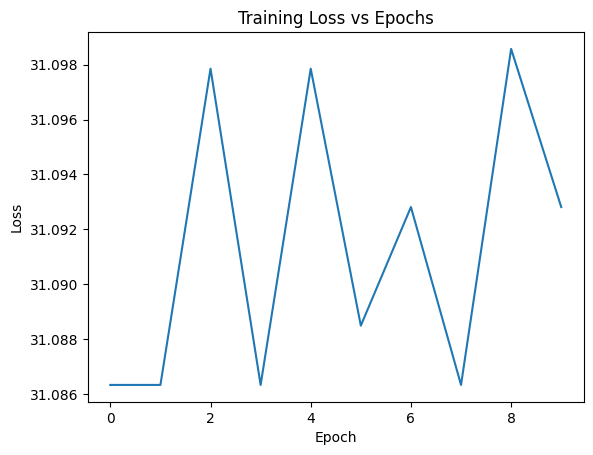

Validation_accuracy,▁▁█▁█▂▅▁█▅
epoch,▁▂▃▃▄▅▆▆▇█
training_accuracy,██▁█▁▇▄█▁▄
training_loss,▁▁█▁█▂▅▁█▅
Validation_accuracy,10.09167
epoch,9
training_accuracy,9.97708
training_loss,31.09281


wandb: Agent Starting Run: u1q4k6xz with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layer: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: RMSprop
wandb: 	weight: random
wandb: 	weight_decay: 0.0005


Epoch 1, Loss: 1.7911967592589673 , Accuracy: 43.983333333333334
Epoch 2, Loss: 1.00361226532671 , Accuracy: 62.38541666666667
Epoch 3, Loss: 0.9134723152591816 , Accuracy: 61.90833333333333
Epoch 4, Loss: 0.9129417628059074 , Accuracy: 62.516666666666666
Epoch 5, Loss: 0.8628760216265343 , Accuracy: 64.76666666666667
Epoch 6, Loss: 0.9042170262692751 , Accuracy: 59.577083333333334


In [ ]:


# Initialize WandB sweep
sweep_config = {
    "method": "bayes",  # Bayesian optimization for efficiency
    "metric": {"name": "val_accuracy", "goal": "maximize"},
    "parameters": {
        "epochs": {"values": [5, 10]},
        "hidden_layer": {"values": [3, 4, 5]},
        "hidden_size": {"values": [32, 64, 128]},
        "weight_decay": {"values": [0, 0.0005, 0.5]},
        "learning_rate": {"values": [1e-3, 1e-4]},
        "optimizer": {"values": ["sgd", "momentum", "nag", "RMSprop", "adam", "nadam"]},
        "batch_size": {"values": [16, 32, 64]},
        "weight": {"values": ["random", "Xavier"]},
        "activation": {"values": ["sigmoid", "tanh", "relu"]},
    }
}

sweep_id = wandb.sweep(sweep=sweep_config, project="DA6401_Assignment1_ma23m011")


def main():
    """Main function executed for each WandB sweep run."""
    with wandb.init() as run:
        config = wandb.config
        run_name = (f"ac-{config.activation}_hs-{config.hidden_size}_epc-{config.epochs}_"
                    f"hl-{config.hidden_layer}_wd-{config.weight_decay}_step_size-{config.learning_rate}_"
                    f"opt-{config.optimizer}_bs-{config.batch_size}_wi-{config.weight}")

        wandb.run.name = run_name

        # Train the model using selected hyperparameters
        model_train(
            step_size=config.learning_rate,
            X_trn=X_trn,
            Y_trn=Y_trn,
            X_valid=X_valid,
            Y_valid=Y_valid,
            optimizer=config.optimizer,
            regular_param=config.weight_decay,
            epochs=config.epochs,
            act_f=config.activation,
            hidden_lyr_num=config.hidden_layer,
            hidden_lyr_nod_num=[config.hidden_size] * config.hidden_layer,
            paramt=config.weight,
            input_dimm=784,
            output_dimm=10,
            batch_size=config.batch_size,
            eps=0.01,
            beta1_val=0.9,
            beta2_val=0.99
        )


# Start the sweep with multiple runs
wandb.agent(sweep_id, function=main, count=7)

# Finalize the WandB session
wandb.finish()


In [ ]:
def opt_RMSprop(step_size, theta_0, X_trn, Y_trn,X_valid, Y_valid,act_f, epochs, hidden_lyr_num, input_dimm,batch_size, eps=0.01, beta_val=0.9):
    loss_val = []
    length = X_trn.shape[0]
    V = {key: np.zeros_like(value) for key, value in theta_0.items()}
    Prev_V = {key: np.zeros_like(value) for key, value in theta_0.items()}
    for epoch in range(epochs):
        count_of_pts = 0
        loss = 0
        new_gradient = {key: np.zeros_like(value) for key, value in theta_0.items()}
        for j in range(length):
            count_of_pts += 1
            z = X_trn[j, :].reshape(-1, 1)
            Y_true = Y_trn[j, :].reshape(-1, 1)
            gradient = BackProp(z, Y_true,act_f, hidden_lyr_num, theta_0, input_dimm)
            for i in range(hidden_lyr_num+1, 0, -1):
                new_gradient['W'+str(i)] += gradient['W'+str(i)]
                new_gradient['b'+str(i)] += gradient['b'+str(i)]

            if count_of_pts % batch_size == 0:

              for i in range(1, hidden_lyr_num + 2):
                  # Update velocity
                  V['W' + str(i)] = beta_val * Prev_V['W' + str(i)] + (1-beta_val)* ((new_gradient['W'+str(i)])**2)
                  V['b' + str(i)] = beta_val * Prev_V['b' + str(i)] + (1-beta_val)* ((new_gradient['b'+str(i)])**2)

              for i in range(1, hidden_lyr_num + 2):
                  # Update parameters
                  theta_0['W' + str(i)] -= (step_size/ (np.sqrt(V['W' + str(i)] + eps)) )*new_gradient['W'+str(i)]
                  theta_0['b' + str(i)] -= (step_size/ (np.sqrt(V['b' + str(i)] + eps)) )*new_gradient['b'+str(i)]

              for i in range(1, hidden_lyr_num + 2):
                  Prev_V['W' + str(i)] = V['W' + str(i)]
                  Prev_V['b' + str(i)] = V['b' + str(i)]


        acc = calAccuracy(X_trn,Y_trn,theta_0,act_f, hidden_lyr_num,input_dimm)
        a, _, Y_Pred = ForwardProp(X_trn.T,theta_0,act_f, hidden_lyr_num,input_dimm)
        loss = cross_entropy_f(Y_trn.T, Y_Pred)
        loss_val.append(loss)
        validation_accuracy = calAccuracy(X_valid,Y_valid,theta_0,act_f, hidden_lyr_num,input_dimm)
        print(f"Epoch {epoch+1}, Train_Loss: {loss} , Train_Accuracy: {acc*100},Test accutacy: {validation_accuracy*100}")

    # Plot the loss function over epochs
    plt.plot(loss_val)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss vs Epochs')
    plt.show()

    return theta_0

def opt_Adam(step_size, theta_0, X_trn, Y_trn, X_valid, Y_valid, act_f, epochs, hidden_lyr_num, input_dimm,batch_size,eps, beta1_val=0.9,beta2_val= 0.99):
    loss_val = []
    length = X_trn.shape[0]
    V = {key: np.zeros_like(value) for key, value in theta_0.items()}
    Prev_V = {key: np.zeros_like(value) for key, value in theta_0.items()}
    V_cap = {key: np.zeros_like(value) for key, value in theta_0.items()}

    M = {key: np.zeros_like(value) for key, value in theta_0.items()}
    Prev_M = {key: np.zeros_like(value) for key, value in theta_0.items()}
    M_cap = {key: np.zeros_like(value) for key, value in theta_0.items()}

    for epoch in range(epochs):
        t = 0
        count_of_pts = 0
        loss = 0
        new_gradient = {key: np.zeros_like(value) for key, value in theta_0.items()}
        for j in range(length):
            z = X_trn[j, :].reshape(-1, 1)
            Y_true = Y_trn[j, :].reshape(-1, 1)
            gradient = BackProp(z, Y_true,act_f, hidden_lyr_num, theta_0, input_dimm)
            for i in range(hidden_lyr_num+1, 0, -1):
                new_gradient['W'+str(i)] += gradient['W'+str(i)]
                new_gradient['b'+str(i)] += gradient['b'+str(i)]

            count_of_pts = count_of_pts + 1
            if count_of_pts % batch_size == 0:
              t = t + 1

              for i in range(1, hidden_lyr_num + 2):
                  M['W' + str(i)] = beta1_val * Prev_M['W' + str(i)] + (1-beta1_val)* new_gradient['W'+str(i)]
                  M['b' + str(i)] = beta1_val * Prev_M['b' + str(i)] + (1-beta1_val)* new_gradient['b'+str(i)]

              for i in range(1, hidden_lyr_num + 2):
                  M_cap['W' + str(i)] = (1/(1-np.power(beta1_val,t))) * M['W' + str(i)]
                  M_cap['b' + str(i)] = (1/(1-np.power(beta1_val,t))) * M['b' + str(i)]
                  Prev_M['W' + str(i)] = M['W' + str(i)]
                  Prev_M['b' + str(i)] = M['b' + str(i)]

              for i in range(1, hidden_lyr_num + 2):
                  V['W' + str(i)] = beta2_val * Prev_V['W' + str(i)] + (1-beta2_val)* ((new_gradient['W'+str(i)])**2)
                  V['b' + str(i)] = beta2_val * Prev_V['b' + str(i)] + (1-beta2_val)* ((new_gradient['b'+str(i)])**2)

              for i in range(1, hidden_lyr_num + 2):
                  V_cap['W' + str(i)] = (1/(1-np.power(beta2_val,t))) * V['W' + str(i)]
                  V_cap['b' + str(i)] = (1/(1-np.power(beta2_val,t))) * V['b' + str(i)]
                  Prev_V['W' + str(i)] = V['W' + str(i)]
                  Prev_V['b' + str(i)] = V['b' + str(i)]


              for i in range(1, hidden_lyr_num + 2):
                  # Update parameters
                  theta_0['W' + str(i)] -= (step_size/ (np.sqrt(V_cap['W' + str(i)] + eps)) )*(M_cap['W'+str(i)])
                  theta_0['b' + str(i)] -= (step_size/ (np.sqrt(V_cap['b' + str(i)] + eps)) )*(M_cap['b'+str(i)])


        acc = calAccuracy(X_trn,Y_trn,theta_0,act_f, hidden_lyr_num,input_dimm)
        a, _, Y_Pred = ForwardProp(X_trn.T,theta_0,act_f, hidden_lyr_num,input_dimm)
        loss = cross_entropy_f(Y_trn.T, Y_Pred)
        loss_val.append(loss)
        validation_accuracy = calAccuracy(X_valid,Y_valid,theta_0,act_f, hidden_lyr_num,input_dimm)
        print(f"Epoch {epoch+1}, Train_Loss: {loss} , Train_Accuracy: {acc*100},Test accutacy: {validation_accuracy*100}")
    # Plot the loss function over epochs
    plt.plot(loss_val)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss vs Epochs')
    plt.show()

    return theta_0

def opt_Nadam(step_size, theta_0, X_trn, Y_trn,X_valid, Y_valid,act_f, epochs, hidden_lyr_num, input_dimm, batch_size,eps, beta1_val=0.9,beta2_val=0.99):
    loss_val = []
    length = X_trn.shape[0]
    V = {key: np.zeros_like(value) for key, value in theta_0.items()}
    Prev_V = {key: np.zeros_like(value) for key, value in theta_0.items()}
    V_cap = {key: np.zeros_like(value) for key, value in theta_0.items()}

    M = {key: np.zeros_like(value) for key, value in theta_0.items()}
    Prev_M = {key: np.zeros_like(value) for key, value in theta_0.items()}
    M_cap = {key: np.zeros_like(value) for key, value in theta_0.items()}

    for epoch in range(epochs):
        t = 0
        count_of_pts = 0
        loss = 0
        new_gradient = {key: np.zeros_like(value) for key, value in theta_0.items()}
        for j in range(length):
            z = X_trn[j, :].reshape(-1, 1)
            Y_true = Y_trn[j, :].reshape(-1, 1)
            gradient = BackProp(z, Y_true,act_f, hidden_lyr_num, theta_0, input_dimm)
            for i in range(hidden_lyr_num+1, 0, -1):
                new_gradient['W'+str(i)] += gradient['W'+str(i)]
                new_gradient['b'+str(i)] += gradient['b'+str(i)]

            count_of_pts += 1
            if count_of_pts % batch_size == 0:
              t = t + 1

              for i in range(1, hidden_lyr_num + 2):
                  M['W' + str(i)] = beta1_val * Prev_M['W' + str(i)] + (1-beta1_val)* new_gradient['W'+str(i)]
                  M['b' + str(i)] = beta1_val * Prev_M['b' + str(i)] + (1-beta1_val)* new_gradient['b'+str(i)]

              for i in range(1, hidden_lyr_num + 2):
                  M_cap['W' + str(i)] = (1/(1-np.power(beta1_val,t))) * M['W' + str(i)]
                  M_cap['b' + str(i)] = (1/(1-np.power(beta1_val,t))) * M['b' + str(i)]
                  Prev_M['W' + str(i)] = M['W' + str(i)]
                  Prev_M['b' + str(i)] = M['b' + str(i)]

              for i in range(1, hidden_lyr_num + 2):
                  V['W' + str(i)] = beta2_val * Prev_V['W' + str(i)] + (1-beta2_val)* ((new_gradient['W'+str(i)])**2)
                  V['b' + str(i)] = beta2_val * Prev_V['b' + str(i)] + (1-beta2_val)* ((new_gradient['b'+str(i)])**2)

              for i in range(1, hidden_lyr_num + 2):
                  V_cap['W' + str(i)] = (1/(1-np.power(beta2_val,t))) * V['W' + str(i)]
                  V_cap['b' + str(i)] = (1/(1-np.power(beta2_val,t))) * V['b' + str(i)]
                  Prev_V['W' + str(i)] = V['W' + str(i)]
                  Prev_V['b' + str(i)] = V['b' + str(i)]


              for i in range(1, hidden_lyr_num + 2):
                  # Update parameters
                  theta_0['W' + str(i)] -= (step_size/ (np.sqrt(V_cap['W' + str(i)] + eps)) )*(beta1_val*(M_cap['W'+str(i)])+((1-beta1_val)*(new_gradient['W'+str(i)]))/(1-np.power(beta1_val,t)))
                  theta_0['b' + str(i)] -= (step_size/ (np.sqrt(V_cap['b' + str(i)] + eps)) )*(beta1_val*(M_cap['b'+str(i)])+((1-beta1_val)*(new_gradient['b'+str(i)]))/(1-np.power(beta1_val,t)))

        acc = calAccuracy(X_trn,Y_trn,theta_0,act_f, hidden_lyr_num,input_dimm)
        a, _, Y_Pred = ForwardProp(X_trn.T,theta_0,act_f, hidden_lyr_num,input_dimm)
        loss = cross_entropy_f(Y_trn.T, Y_Pred)
        loss_val.append(loss)
        test_accuracy = calAccuracy(X_valid,Y_valid,theta_0,act_f, hidden_lyr_num,input_dimm)

        print(f"Epoch {epoch+1}, Train_Loss: {loss} , Train_Accuracy: {acc*100},Test accutacy: {test_accuracy*100}")

    plt.plot(loss_val)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss vs Epochs')
    plt.show()

    return theta_0


In [ ]:
ideal_epochs = 10
ideal_weight = 'xavier'
ideal_act_fc = 'relu'
ideal_hidden_size = 128
ideal_batch_size = 64
ideal_optimizer = 'RMSprop'
ideal_hidden_layer = 5
ideal_weight_decay = 0
ideal_learning_rate = 0.0001




In [ ]:
W_b1 = initial_network( hidden_lyr_num=5,hidden_lyr_nod_num=128, paramt='xavier',input_dimm=784 , output_dimm=10 )
W_b_rms= opt_RMSprop(0.0001, W_b1, X_trn, Y_trn, X_tst, Y_tst,act_f='relu', epochs=10, hidden_lyr_num=5, input_dimm=784 ,batch_size=64, eps=0.01, beta_val=0.9)


TypeError: 'int' object is not subscriptable

In [ ]:
y_test_label = []
Y_tst_Pred_label = []
l = X_tst.shape[0]
for i in range(l):
  X_tes = X_tst[i,:].reshape(-1, 1)
  a,h,Y_tst_Pred = ForwardProp(X_tes,W_b_rms, act_f='relu', hidden_lyr_num=5,input_dimm=784)
  y1 = np.argmax(Y_tst[i,:].reshape(-1, 1), axis = 0)
  y_test_label.append(y1)
  y2 = np.argmax(Y_tst_Pred, axis = 0)
  Y_tst_Pred_label.append(y2)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_label[:10000], Y_tst_Pred_label[:10000])

class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress","Coat","Sandal","Shirt", "Sneaker", "Bag","Ankle boot"]

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_name)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
cm_display.plot(ax=ax, cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


NameError: name 'W_b_rms' is not defined

In [ ]:
from keras.datasets import mnist
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()
print(Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Flatten the image data
X_trn = Xtrain.reshape(Xtrain.shape[0], -1)
X_test = Xtest.reshape(Xtest.shape[0], -1)

# Normalize the image data
MX_trn = X_trn / 255.0
MX_test = X_test / 255.0

def one_hot_encod(arr):
  mat = np.zeros((len(arr),10))
  for i in range(len(arr)):
    mat[i,arr[i]] = 1
  return mat
# Convert labels to one-hot encoding
MY_trn =  one_hot_encod(ytrain)
MY_test =  one_hot_encod(ytest)
print("Training images shape:", MX_trn.shape)
print("Training labels shape:", MY_trn.shape)
print("Testing images shape:", MX_test.shape)
print("Testing labels shape:", MY_test.shape)


Training images shape: (60000, 784)
Training labels shape: (60000, 10)
Testing images shape: (10000, 784)
Testing labels shape: (10000, 10)


In [ ]:
#---------------------------------------------------
#step_size = 0.0001 , hidden_lyr_num = 5 , num_nodes_hidden_layers= 128, weight = xavior, act_f = 'relu' , epoch = 10 , batch_size = 64
#----------------------------------------------------
W_b1 = initial_network( hidden_lyr_num=5, num_nodes_hidden_layers=128, weight='xavier',input_dimm=784 , output_dimm=10 )
Wb1 =opt_RMSprop(0.0001, W_b1, MX_trn, MY_trn,MX_test, MY_test,act_f='relu', epochs=10, hidden_lyr_num=5, input_dimm=784 ,batch_size=64, eps=0.01, beta_val=0.9)

#---------------------------------------------------
# step_size = 0.0001 , hidden_lyr_num = 3 , num_nodes_hidden_layers= 128, weight = xavior, act_f = 'sigmoid' , epoch = 10 , batch_size = 32
#----------------------------------------------------
W_b2 = initial_network( hidden_lyr_num=3, num_nodes_hidden_layers=128, weight='xavier',input_dimm=784 , output_dimm=10 )
Wb2 = opt_Adam(0.0001,  W_b2, MX_trn, MY_trn,MX_test, MY_test, act_f='sigmoid', epochs=10, hidden_lyr_num=3, input_dimm=784,batch_size=32 ,eps=0.01, beta1_val=0.9,beta2_val= 0.99)


#---------------------------------------------------
# step_size = 0.0001 , hidden_lyr_num = 3 , num_nodes_hidden_layers= 64, weight = xavior, act_f = 'relu' , epoch = 10 , batch_size = 32
#----------------------------------------------------
W_b3 = initial_network(hidden_lyr_num=3, num_nodes_hidden_layers=64, weight='xavier',input_dimm=784 , output_dimm=10)
Wb3 = opt_Nadam(0.0001, W_b3, MX_trn, MY_trn,MX_test, MY_test,act_f='relu', epochs=10, hidden_lyr_num=3, input_dimm=784,batch_size=32,eps=0.01, beta1_val=0.9,beta2_val=0.99)


TypeError: initial_network() got an unexpected keyword argument 'num_nodes_hidden_layers'